In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("score.csv")
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [8]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
df.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
print(df.columns)
columns=list(df.columns)

Index(['Hours', 'Scores'], dtype='object')


In [35]:
X = df["Hours"].values.reshape(-1,1)
Y = df["Scores"].values.reshape(-1,1)
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]], dtype=int64))

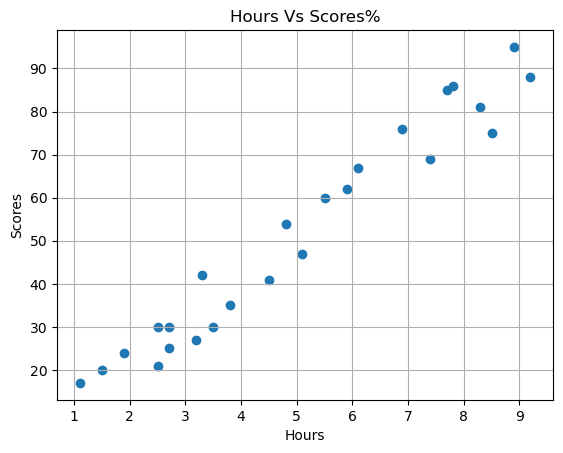

In [13]:
plt.scatter( X , Y , color = "#1f77b4" )
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores%")
plt.grid()
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()
lr

LinearRegression()

In [18]:
lr.fit(x_train,y_train)


LinearRegression()

In [20]:
line = lr.coef_ * X + lr.intercept_

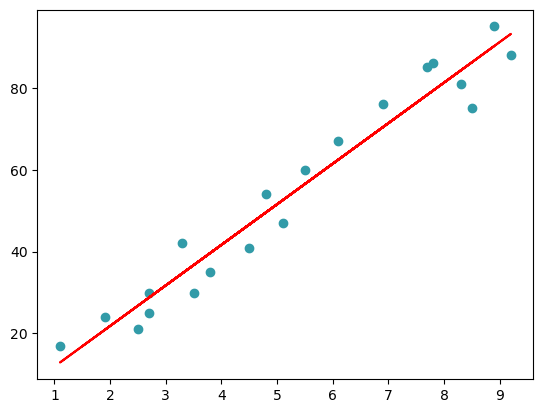

In [21]:
plt.scatter(x_train , y_train , color = "#329ba8")
plt.plot(X , line , color = "r")
plt.show()

In [22]:
Y_pred = lr.predict(x_test)
Y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

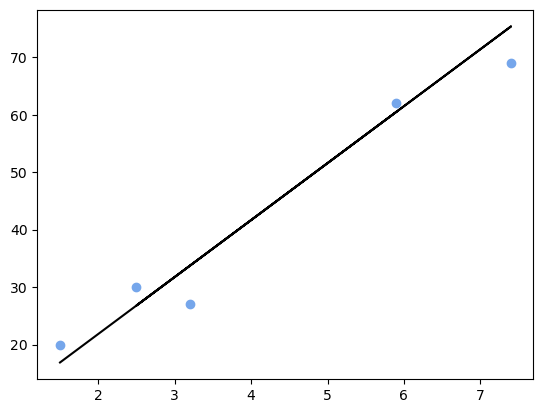

In [23]:
plt.scatter(x_test,y_test , color = "#75a6eb")
plt.plot(x_test,Y_pred , color = "black")
plt.show()

In [24]:
df_predict = pd.DataFrame({"Hours": x_test.reshape(1,-1)[0] , "Actual Score" : y_test.reshape(1,-1)[0] , "Predicted Score" : Y_pred.reshape(1,-1)[0]})
df_predict

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


In [25]:
df_sorted = df_predict.sort_values(by = "Hours")
df_sorted

,Hours,Actual Score,Predicted Score
0,1.5,20,16.884145
3,2.5,30,26.794801
1,3.2,27,33.732261
4,5.9,62,60.491033
2,7.4,69,75.357018


C:\Users\eSS\AppData\Local\Temp\ipykernel_3444\1582711396.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
C:\Users\eSS\AppData\Local\Temp\ipykernel_3444\1582711396.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

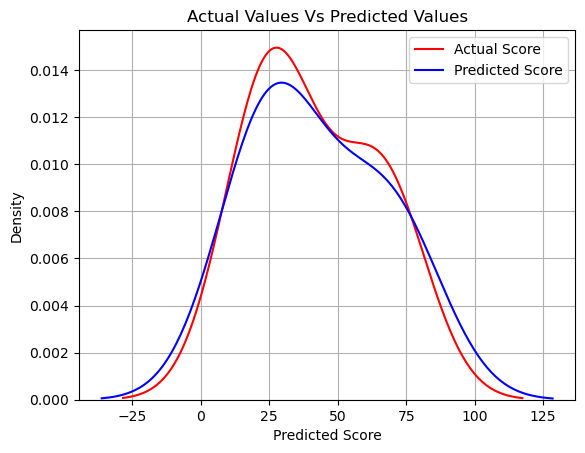

In [26]:
title = "Actual Values Vs Predicted Values"

ax1 = sns.distplot(df_sorted["Actual Score"], hist = False , color = "red" , label = "Actual Score")
sns.distplot(df_sorted["Predicted Score"] , hist = False , color = "blue" , label = "Predicted Score" , ax = ax1)

plt.legend()
plt.grid()
plt.title(title)
plt.show()

In [27]:
from sklearn.metrics import r2_score
from sklearn import metrics

mean_absolute_error=metrics.mean_absolute_error(y_test,Y_pred)
print('Mean absolute error:',mean_absolute_error)

corr=r2_score(y_train,lr.predict(x_train))
print('correlation:',corr)

acc=r2_score(y_test,Y_pred)
print('Accuracy:',acc)

Mean absolute error: 4.183859899002975
correlation: 0.9515510725211552
Accuracy: 0.9454906892105356


In [30]:
hrs = 6
pred = lr.predict([[6]])
print("The predicted score if a student studies for 6 hrs/ day is",pred[0])

The predicted score if a student studies for 6 hrs/ day is [61.48209893]
